In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import xgboost as xgb


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("./drive/My Drive/INeuron_hackathon/bundle_2/cardiovascular/cardio_train.csv", sep = ";", engine = "python")
df = data.copy()

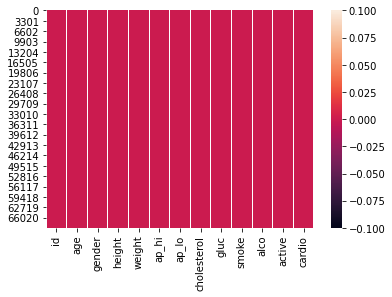

In [0]:
sns.heatmap(df.isna())

In [0]:
#data Preprocessing

In [0]:
def preprocess(df):
    df.drop(["id"], inplace = True, axis = 1)
    df["age"] = df["age"].div(365)
    df[df["gender"] == 2] = 0
    df["height"] = df["height"].div(100)
    return df

In [0]:
df = data.copy()
df = preprocess(df)

In [0]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,1.55,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,1.63,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,1.65,70.0,120,80,1,1,0,0,1,0
3,0.000000,0,0.00,0.0,0,0,0,0,0,0,0,0
4,64.090411,1,1.55,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,0.000000,0,0.00,0.0,0,0,0,0,0,0,0,0
69297,61.920548,1,1.58,126.0,140,90,2,2,0,0,1,1
69298,0.000000,0,0.00,0.0,0,0,0,0,0,0,0,0
69299,61.454795,1,1.63,72.0,135,80,1,2,0,0,0,1


In [0]:
#train test split

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# model 1 xgboost(random search)


In [0]:
import xgboost
classifier1 = xgboost.XGBClassifier(verbosity = 3)


In [0]:
n_estimators = [40, 100, 200, 500]
max_depth = [2, 3, 5, 10, 15]
#more the gamma, more complex and conservative the model, as gamma increases, for minimum loss reduction , new leaf
#node will be created
gamma = [0, 0.1, 0.2, 0.3, 0.4]
colsample_bytree = [0.3, 0.4, 0.5, 0.7]
min_child_weights = [1,2,3,4]
booster = ["gbtree", "gblinear"]
base_score = [0.25,0.5,0.75,1]
eta = [0.01, 0.1, 0.15, 0.2, 0.25]
params = {
    "max_depth" : max_depth,
    "n_estimators" : n_estimators, 
    "gamma": gamma,
    "colsample_bytree": colsample_bytree,
    "min_child_weights": min_child_weights, 
    "base_score": base_score,
    "booster" : booster,
    "eta": eta
}

In [0]:
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
random_search = RandomizedSearchCV(classifier1, params, scoring="neg_log_loss", n_jobs=-1, cv=5, verbose = True)
random_result = random_search.fit(X_train, y_train)
random_result.best_score_



In [0]:
random_result.best_estimator_

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.2, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_child_weights=2, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=3)

In [0]:
classifier1 = xgboost.XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.2, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_child_weights=2, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=3)

In [0]:
classifier1.fit(X_train, y_train)

[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 4 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 12 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 8 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes, 24 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 14 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 4 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 26 pruned nodes, max_depth=10
[01:10:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 r

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.2, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_child_weights=2, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=3)

In [0]:
y_pred = classifier1.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8277180578601833

In [0]:
import joblib
#save model
joblib.dump(classifier1, "xgbclassifier_random")


['xgbclassifier_random']

# model 2 xgboost

In [0]:
classifier2 = xgboost.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators = 600, 
                      reg_alpha = 0.3,
                      max_depth= 10, 
                      gamma = 5, 
                      booster = "gbtree", 
                      scoring="neg_log_loss", verbosity = 1)

In [0]:
classifier2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1,
              scoring='neg_log_loss', seed=None, silent=False, subsample=0.8,
              verbosity=1)

In [0]:
y_pred = classifier2.predict(X_test)

In [0]:
cm = confusion_matrix(y_test, y_pred)

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()
(tn, fp, fn, tp)

(8381, 1031, 1335, 3114)

In [0]:
accuracy_score(y_test, y_pred)

0.8293052449318231

xgboost model without 

In [0]:
import joblib
#save model
joblib.dump(classifier2, "xgbclassifier")

#load saved model
shine = joblib.load("xgbclassifier")